In [1]:
from ase.io import read
import numpy as np 
import tidynamics
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import signal
import time

In [2]:
def calc_ACF_fft(array_1D):
    # Normalization
    yunbiased = array_1D - np.mean(array_1D, axis=0)
    ynorm = np.sum(np.power(yunbiased,2), axis=0)
#    print("the average value of input data array", ynorm)
    
    autocor = signal.fftconvolve(array_1D,
                                 array_1D[::-1],
                                 mode='full')[len(array_1D)-1:] / ynorm
    return autocor

In [3]:
# Generate data for a Ornstein-Uhlenbeck process

gamma = 2.7
T = 0.1
dt = 0.02
v_factor = np.sqrt(2*T*gamma*dt)

N = 32768
v = 0
for i in range(100):
    noise_force = v_factor*np.random.normal()
    v = v - gamma*v*dt + noise_force

v_data = []
noise_data = []

for i in range(N):
    noise_force = v_factor*np.random.normal()
    v = v - gamma*v*dt + noise_force
    v_data.append(v)
    noise_data.append(noise_force)
v_data = np.array(v_data)
noise_data = np.array(noise_data)/np.sqrt(dt)

In [ ]:
v_data.ndim

In [ ]:
ac = calc_ACF_fft(array_1D=v_data)[:N//64]

In [ ]:
plt.plot(ac)

In [ ]:
def calc_ACF_direct(array_1D):
#    # calculate the ACF
#    nmax = len(array_1D)
#    ACF = np.zeros((nmax,))
#    for i in range(nmax):
#        for j in range(nmax-i):
#            ACF[j] = ACF[j] + np.sum(array_1D[i]*array_1D[j+i])
#        ACF[i] = ACF[i]/(nmax-i)
#    return ACF
    # Normalization
    yunbiased = array_1D - np.mean(array_1D, axis=0)
    ynorm = np.sum(np.power(yunbiased,2), axis=0)
#    print("the average value of input data array", ynorm)
    
    autocor = np.correlate(array_1D,
                                 array_1D,
                                 mode='full')[len(array_1D)-1:] / ynorm
    return autocor

In [ ]:
sc_2 = calc_ACF_direct(array_1D=v_data)[:N//64]

In [ ]:
plt.plot(sc_2)

In [ ]:
import tidynamics
acf = tidynamics.acf(v_data)[:N//64]

In [ ]:
plt.plot(acf)

In [ ]:
def calc_VACF_fft(velocity_1, velocity_2):
    # Normalization
    n = len(velocity_1)
    norm = n * np.var(velocity_1)
    
    autocor = signal.fftconvolve(velocity_1,
                                 velocity_2[::-1],
                                 mode='full')[len(velocity_1)-1:] / norm
    return autocor

In [ ]:
st = calc_VACF_fft(velocity_1=v_data,velocity_2=v_data)[:N//64]

In [ ]:
plt.plot(st)

In [ ]:
len(v_data)//64

In [ ]:
def correlate(a,b):
    #Use fast Fourier transforms to calculate the correlation function between a and b
    #Zeros are added to the end of the arrays to avoid wrapping the calculation
    al = np.concatenate((a,np.zeros(len(a))),axis=0)
    bl = np.concatenate((b,np.zeros(len(b))),axis=0)
    c= np.fft.ifft(np.fft.fft(al)*np.conjugate(np.fft.fft(bl))).real
    d = c[:int(len(c)/2)]
    d/=(np.arange(len(d))+1)[::-1]
    return d

In [ ]:
t  = correlate(a=v_data, b=v_data)

In [ ]:
plt.plot(t)

In [ ]:
def VACF(V_1, V_2):
    """
    Calculate the velocity auto-correlation function.

    """

    #n_steps = V_1.shape[0]
    # mean velocity auto-correlation for all degrees of freedom
    vac2 = np.correlate(V_1, V_2, 'full') #for v_1, v_2 in zip(V_1, V_2)]
    
    d = vac2[:int(len(vac2)/2)]
    
    d/=(np.arange(len(d))+1)[::-1]
    
    #vac2 /= np.linalg.norm(vac2, axis=1)[:, None]
    #vac2 = np.mean(vac2, axis=0)


    return d[:len(V_1)]

In [ ]:
v_data.shape[0]

In [ ]:
v = VACF(V_1=v_data, V_2=v_data)

In [ ]:
plt.plot(v)
plt.xlim([32500,32800])

In [ ]:
def VACF(V_1, V_2):
    """
    Calculate the velocity auto-correlation function.

    """

    n_steps = len(V_1)#V_1.shape[1]

    # mean velocity auto-correlation for all degrees of freedom
    vac2 = [np.correlate(v_1, v_2, 'full') for v_1, v_2 in zip(V_1, V_2)]
    vac2 /= np.linalg.norm(vac2, axis=1)[:, None]
    #vac2 = np.mean(vac2, axis=0)
    return vac2

In [ ]:

s = VACF(V_1=v_data,V_2=v_data)

In [ ]:
N = 0
ND = 3
data = np.ones((N, ND))
data.shape

In [ ]:
import numpy as np

# create velocity data (100 frames, 10 particles)
velocity = np.random.rand(100000, 162)


In [ ]:

# compute VACF using the first method
N = len(velocity[0])
M = len(velocity)
max_T = M // 2

from scipy import signal
tcf_1 = np.zeros(max_T)

for T in range(max_T):
    sum_T = 0
    for i in range(M - T):
        sum_t = 0
        for j in range(N):
            sum_t += signal.fftconvolve(velocity[i][j], velocity[i+T][j], mode='full')
        sum_T += sum_t / N
    tcf_1[T] = sum_T / (M - T)

tcf_1 = tcf_1 / tcf_1[0]

print(tcf_1)


$tcf(T) = \frac{1}{M - T} \sum\limits_{i=1}^{M-T} \frac{1}{N} \sum\limits_{j=1}^{N} v_{i,j} \cdot v_{i+T,j}$

Where:

$tcf(T)$ is the time correlation function at time lag $T$
$M$ is the number of frames
$N$ is the number of particles
$v_{i,j}$ is the velocity of particle $j$ at frame $i$
$T$ is the time lag

In [ ]:
# compute VACF using the second method
N = len(velocity[0])
M = len(velocity)
max_T = M // 2

tcf = np.zeros(max_T)

for T in range(0,max_T,1000):
    sum_T = 0
    for i in range(M - T):
        sum_t = 0
        for j in range(N):
            sum_t += velocity[i][j] * velocity[i+T][j]
        sum_T += sum_t / N
    tcf[T] = sum_T / (M - T)

tcf = tcf / tcf[0]

print(tcf)


In [ ]:
#plt.plot(tcf_1)
plt.plot(tcf)
plt.xlim([0,100])

In [ ]:
import tidynamics

N = len(velocity[0])     # number of particles
M = len(velocity)  # number of frames

max_T = M//2  # maximum time lag

# Calculate the auto-correlation function
#auto_corr = np.mean([np.dot(velocity_x[i], velocity_x[i]) for i in range(M)])

# Calculate the time correlation function using tidynamics
vacf_ti = np.zeros(max_T)
for T in range(max_T):
    acf_t = 0
    for j in range(N):
        acf_t += tidynamics.acf(velocity[T][j])
    vacf_ti[T] = acf_t / N

# Normalize the time correlation function
#vacf_ti = vacf_ti / auto_corr
vacf_ti = vacf_ti / vacf_ti[0]

In [ ]:
plt.plot(tidynamics.acf(velocity))


In [ ]:
def select_power_of_two(n):
    """
    Select the closest i such that n<=2**i
    """
    current_exp = int(np.ceil(np.log2(n+1)))
    if n == 2**current_exp:
        n_fft = n
    if n < 2**current_exp:
        n_fft = 2**current_exp
    elif n > 2**current_exp:
        n_fft = 2**(current_exp+1)

    return n_fft

def crosscorrelation_1d(a, b):
    """
    Compute the cross-correlation of two scalar time series.
    """

    N = len(a)
    n_fft = select_power_of_two(N)

    # Pad the signals with zeros to avoid the periodic images.

    R_a = np.zeros(2*n_fft)
    R_b = np.zeros(2*n_fft)
    R_a[:N] = a
    R_b[:N] = b

    F_a = np.fft.fft(R_a)
    F_b = np.fft.fft(R_b)

    result = np.fft.ifft(F_a*F_b.conj())[:N].real/(N-np.arange(N))

    return result


(0.0, 100.0)

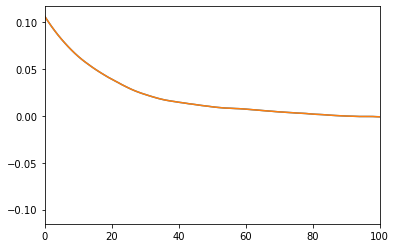

In [5]:
plt.plot(tidynamics.acf(v_data))
plt.plot(tidynamics.ccf(v_data,v_data))
plt.xlim([0,100])